In [1]:
import warnings
warnings.filterwarnings("ignore")

# Importing the usual utilities
import numpy as np, pandas as pd
import re, random, os, string

from pprint import pprint #pretty print

# 1.Read the .csv file using Pandas. Take a look at the top few records.

In [2]:
reviews0 = pd.read_csv("K8 Reviews v0.2.csv")
reviews0.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [3]:
pd.value_counts(reviews0['sentiment'])

0    7712
1    6963
Name: sentiment, dtype: int64

<AxesSubplot:>

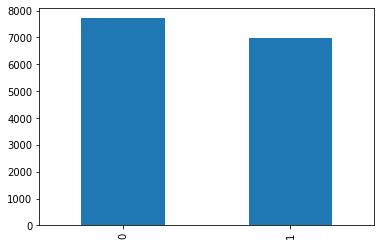

In [4]:
pd.value_counts(reviews0['sentiment']).plot.bar()

# 2.Normalize casings for the review text and extract the text into a list for easier manipulation.

In [5]:
#Making everthing in lower case
normal_review=[x.lower() for x in reviews0.review]

In [6]:
# removing the reviews which has length less than 10 as smaller reviews usually don't contribute much to analysis
normal_review=[x for x in normal_review if len(x)>10]
normal_review[:10]

['good but need updates and improvements',
 "worst mobile i have bought ever, battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if i put mobile idle its getting discharged.this is biggest lie from amazon & lenove which is not at all expected, they are making full by saying that battery is 4000mah & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.don't know how lenovo will survive by making full of us.please don;t go for this else you will regret like me.",
 'when i will get my 10% cash back.... its already 15 january..',
 'the worst phone everthey have changed the last phone but the problem is still same and the amazon is not returning the phone .highly disappointing of amazon',
 "only i'm telling don't buyi'm totally disappointedpoor batterypoor camerawaste of money",
 'phone is awesome. but while charging, it heats up allot..really a genuine reason to hate lenovo k8 note',
 'the battery level has worn down',
 "it's over hi

# 3.Tokenize the reviews using NLTKs word_tokenize function.

In [7]:
from nltk.tokenize import word_tokenize

In [8]:
token_review=[word_tokenize(x) for x in normal_review]

In [9]:
token_review[:10]

[['good', 'but', 'need', 'updates', 'and', 'improvements'],
 ['worst',
  'mobile',
  'i',
  'have',
  'bought',
  'ever',
  ',',
  'battery',
  'is',
  'draining',
  'like',
  'hell',
  ',',
  'backup',
  'is',
  'only',
  '6',
  'to',
  '7',
  'hours',
  'with',
  'internet',
  'uses',
  ',',
  'even',
  'if',
  'i',
  'put',
  'mobile',
  'idle',
  'its',
  'getting',
  'discharged.this',
  'is',
  'biggest',
  'lie',
  'from',
  'amazon',
  '&',
  'lenove',
  'which',
  'is',
  'not',
  'at',
  'all',
  'expected',
  ',',
  'they',
  'are',
  'making',
  'full',
  'by',
  'saying',
  'that',
  'battery',
  'is',
  '4000mah',
  '&',
  'booster',
  'charger',
  'is',
  'fake',
  ',',
  'it',
  'takes',
  'at',
  'least',
  '4',
  'to',
  '5',
  'hours',
  'to',
  'be',
  'fully',
  'charged.do',
  "n't",
  'know',
  'how',
  'lenovo',
  'will',
  'survive',
  'by',
  'making',
  'full',
  'of',
  'us.please',
  'don',
  ';',
  't',
  'go',
  'for',
  'this',
  'else',
  'you',
  'will

# 4.Perform parts-of-speech tagging on each sentence using the NLTK POS tagger.

In [10]:
from nltk import pos_tag

In [11]:
pos_tokens=[pos_tag(tokens) for tokens in token_review]

In [12]:
pos_tokens

[[('good', 'JJ'),
  ('but', 'CC'),
  ('need', 'VBP'),
  ('updates', 'NNS'),
  ('and', 'CC'),
  ('improvements', 'NNS')],
 [('worst', 'JJS'),
  ('mobile', 'NN'),
  ('i', 'NN'),
  ('have', 'VBP'),
  ('bought', 'VBN'),
  ('ever', 'RB'),
  (',', ','),
  ('battery', 'NN'),
  ('is', 'VBZ'),
  ('draining', 'VBG'),
  ('like', 'IN'),
  ('hell', 'NN'),
  (',', ','),
  ('backup', 'NN'),
  ('is', 'VBZ'),
  ('only', 'RB'),
  ('6', 'CD'),
  ('to', 'TO'),
  ('7', 'CD'),
  ('hours', 'NNS'),
  ('with', 'IN'),
  ('internet', 'JJ'),
  ('uses', 'NNS'),
  (',', ','),
  ('even', 'RB'),
  ('if', 'IN'),
  ('i', 'JJ'),
  ('put', 'VBP'),
  ('mobile', 'JJ'),
  ('idle', 'NN'),
  ('its', 'PRP$'),
  ('getting', 'VBG'),
  ('discharged.this', 'NN'),
  ('is', 'VBZ'),
  ('biggest', 'JJS'),
  ('lie', 'NN'),
  ('from', 'IN'),
  ('amazon', 'NN'),
  ('&', 'CC'),
  ('lenove', 'NN'),
  ('which', 'WDT'),
  ('is', 'VBZ'),
  ('not', 'RB'),
  ('at', 'IN'),
  ('all', 'DT'),
  ('expected', 'VBN'),
  (',', ','),
  ('they', 'PRP'),


In [13]:
len(pos_tokens[0])

6

# 5.For the topic model, we should  want to include only nouns.

1.Find out all the POS tags that correspond to nouns.

2.Limit the data to only terms with these tags.

In [14]:
import nltk
tagged_tuple = nltk.pos_tag(['great'])

tagged_tuple[0]

('great', 'JJ')

In [15]:
pprint(tagged_tuple[0][0])
pprint(tagged_tuple[0][1])

'great'
'JJ'


In [16]:
pos_tokens[1]

[('worst', 'JJS'),
 ('mobile', 'NN'),
 ('i', 'NN'),
 ('have', 'VBP'),
 ('bought', 'VBN'),
 ('ever', 'RB'),
 (',', ','),
 ('battery', 'NN'),
 ('is', 'VBZ'),
 ('draining', 'VBG'),
 ('like', 'IN'),
 ('hell', 'NN'),
 (',', ','),
 ('backup', 'NN'),
 ('is', 'VBZ'),
 ('only', 'RB'),
 ('6', 'CD'),
 ('to', 'TO'),
 ('7', 'CD'),
 ('hours', 'NNS'),
 ('with', 'IN'),
 ('internet', 'JJ'),
 ('uses', 'NNS'),
 (',', ','),
 ('even', 'RB'),
 ('if', 'IN'),
 ('i', 'JJ'),
 ('put', 'VBP'),
 ('mobile', 'JJ'),
 ('idle', 'NN'),
 ('its', 'PRP$'),
 ('getting', 'VBG'),
 ('discharged.this', 'NN'),
 ('is', 'VBZ'),
 ('biggest', 'JJS'),
 ('lie', 'NN'),
 ('from', 'IN'),
 ('amazon', 'NN'),
 ('&', 'CC'),
 ('lenove', 'NN'),
 ('which', 'WDT'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('at', 'IN'),
 ('all', 'DT'),
 ('expected', 'VBN'),
 (',', ','),
 ('they', 'PRP'),
 ('are', 'VBP'),
 ('making', 'VBG'),
 ('full', 'JJ'),
 ('by', 'IN'),
 ('saying', 'VBG'),
 ('that', 'DT'),
 ('battery', 'NN'),
 ('is', 'VBZ'),
 ('4000mah', 'CD'),
 ('&', 

In [17]:
len(pos_tokens)

13094

In [18]:
nouns_tokens=[]
for i in range(len(pos_tokens)):
    nouns_tokens.append([])

In [19]:
len(nouns_tokens)

13094

In [20]:
#nouns_tokens=[]
for i in range(len(pos_tokens)):
    for n in pos_tokens[i]:
        if n[1].startswith('NN'):
            nouns_tokens[i].append(n[0])

In [21]:
len(nouns_tokens)

13094

In [22]:
doc_complete=[' '.join(map(str,my_list)) for my_list in nouns_tokens]
doc_complete

['updates improvements',
 'mobile i battery hell backup hours uses idle discharged.this lie amazon lenove battery charger hours don',
 'i % cash ..',
 'phone everthey phone problem amazon phone amazon',
 'camerawaste money',
 'phone allot .. reason k8',
 'battery level',
 'problems phone hanging problems note station ahmedabad years phone lenovo',
 'lot glitches thing options',
 'phone charger damage months',
 'item battery life',
 'i battery problem motherboard problem months mobile life',
 'phone slim battry backup screen',
 'headset',
 'time i',
 'product prize range specification comparison mobile range i phone seal i credit card i .. .. deal amazon ..',
 'battery .. solutions battery life',
 'smartphone',
 'galery problem speaker phone',
 'camera speed.excellent features.excelent battery',
 'product',
 'product camera os battery phone product ..',
 'options cast screen wifi call option mobile hotspot',
 'phone usb cable',
 'phone price mobile lenovo display',
 'specifications func

In [23]:
len(doc_complete)

13094

In [24]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = stopwords.words('english')+['h','hi','ho']
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split() if word.isalpha())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete]

In [25]:
doc_clean

[['update', 'improvement'],
 ['mobile',
  'battery',
  'hell',
  'backup',
  'hour',
  'us',
  'idle',
  'dischargedthis',
  'lie',
  'amazon',
  'lenove',
  'battery',
  'charger',
  'hour'],
 ['cash'],
 ['phone', 'everthey', 'phone', 'problem', 'amazon', 'phone', 'amazon'],
 ['camerawaste', 'money'],
 ['phone', 'allot', 'reason'],
 ['battery', 'level'],
 ['problem',
  'phone',
  'hanging',
  'problem',
  'note',
  'station',
  'ahmedabad',
  'year',
  'phone',
  'lenovo'],
 ['lot', 'glitch', 'thing', 'option'],
 ['phone', 'charger', 'damage', 'month'],
 ['item', 'battery', 'life'],
 ['battery', 'problem', 'motherboard', 'problem', 'month', 'mobile', 'life'],
 ['phone', 'slim', 'battry', 'backup', 'screen'],
 ['headset'],
 ['time'],
 ['product',
  'prize',
  'range',
  'specification',
  'comparison',
  'mobile',
  'range',
  'phone',
  'seal',
  'credit',
  'card',
  'deal',
  'amazon'],
 ['battery', 'solution', 'battery', 'life'],
 ['smartphone'],
 ['galery', 'problem', 'speaker', '

# 6.Lemmatize. 

1. Different forms of the terms need to be treated as one.

2. No need to provide POS tag to lemmatizer for now.

In [26]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
corpus=[lemm.lemmatize(word) for words in nouns_tokens for word in words ]
corpus

[nltk_data] Downloading package wordnet to /Users/NEELAM/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['update',
 'improvement',
 'mobile',
 'i',
 'battery',
 'hell',
 'backup',
 'hour',
 'us',
 'idle',
 'discharged.this',
 'lie',
 'amazon',
 'lenove',
 'battery',
 'charger',
 'hour',
 'don',
 'i',
 '%',
 'cash',
 '..',
 'phone',
 'everthey',
 'phone',
 'problem',
 'amazon',
 'phone',
 'amazon',
 'camerawaste',
 'money',
 'phone',
 'allot',
 '..',
 'reason',
 'k8',
 'battery',
 'level',
 'problem',
 'phone',
 'hanging',
 'problem',
 'note',
 'station',
 'ahmedabad',
 'year',
 'phone',
 'lenovo',
 'lot',
 'glitch',
 'thing',
 'option',
 'phone',
 'charger',
 'damage',
 'month',
 'item',
 'battery',
 'life',
 'i',
 'battery',
 'problem',
 'motherboard',
 'problem',
 'month',
 'mobile',
 'life',
 'phone',
 'slim',
 'battry',
 'backup',
 'screen',
 'headset',
 'time',
 'i',
 'product',
 'prize',
 'range',
 'specification',
 'comparison',
 'mobile',
 'range',
 'i',
 'phone',
 'seal',
 'i',
 'credit',
 'card',
 'i',
 '..',
 '..',
 'deal',
 'amazon',
 '..',
 'battery',
 '..',
 'solution',
 'b

# 7. Remove stopwords and punctuation (if there are any).

In [27]:
import nltk
nltk.download('stopwords')
from string import punctuation
from nltk.corpus import stopwords
my_stopwords = stopwords.words('english')+list(punctuation) + ["..."]
# Removing stopwords
clean_corpus=[x for x in corpus if x not in my_stopwords]
# Removing all punctuation marks as well as non alphabetic characters
clean_corpus=[x for x in clean_corpus if x.isalpha()]
len(clean_corpus)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/NEELAM/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


81097

# 8.Create a topic model using LDA on the cleaned up data with 12 topics.

1. Print out the top terms for each topic.

2. What is the coherence of the model with the c_v metric?

In [28]:
# gensim for LDA 
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import ldamodel

In [29]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

/Users/NEELAM/opt/anaconda3/envs/gurunlptensor/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=12, 
                                           random_state=42,
                                           passes=10,
                                           per_word_topics=True)

/Users/NEELAM/opt/anaconda3/envs/gurunlptensor/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
# Print the Keyword in the 12 topics
pprint(lda_model.print_topics())

[(0,
  '0.134*"charger" + 0.068*"charging" + 0.061*"turbo" + 0.051*"superb" + '
  '0.050*"hour" + 0.046*"charge" + 0.020*"hr" + 0.017*"bill" + 0.016*"time" + '
  '0.015*"month"'),
 (1,
  '0.068*"phone" + 0.054*"call" + 0.047*"update" + 0.037*"option" + '
  '0.035*"software" + 0.029*"feature" + 0.027*"app" + 0.027*"apps" + '
  '0.024*"stock" + 0.024*"android"'),
 (2,
  '0.192*"price" + 0.167*"phone" + 0.090*"feature" + 0.075*"range" + '
  '0.069*"issue" + 0.039*"budget" + 0.021*"specification" + 0.018*"buy" + '
  '0.018*"bit" + 0.014*"performance"'),
 (3,
  '0.446*"product" + 0.056*"waste" + 0.055*"money" + 0.049*"delivery" + '
  '0.018*"amazon" + 0.018*"pls" + 0.017*"lenovo" + 0.015*"thanks" + '
  '0.015*"plz" + 0.013*"time"'),
 (4,
  '0.260*"phone" + 0.041*"service" + 0.040*"amazon" + 0.032*"time" + '
  '0.031*"day" + 0.029*"issue" + 0.027*"month" + 0.022*"lenovo" + '
  '0.018*"customer" + 0.016*"glass"'),
 (5,
  '0.245*"battery" + 0.068*"phone" + 0.049*"backup" + 0.044*"day" + '
  '0

/Users/NEELAM/opt/anaconda3/envs/gurunlptensor/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
# Compute Perplexity
print('Perplexity: ', lda_model.log_perplexity(doc_term_matrix))  # a measure of how good the model is. lower the better.

/Users/NEELAM/opt/anaconda3/envs/gurunlptensor/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perplexity:  -7.342200963731044


In [34]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=doc_clean, dictionary=dictionary, 
                                     coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/Users/NEELAM/opt/anaconda3/envs/gurunlptensor/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.5042686531843782


In [35]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

/Users/NEELAM/opt/anaconda3/envs/gurunlptensor/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.158892  0.211596       1        1  15.007003
4      0.195959  0.011455       2        1  14.166902
7      0.144391  0.139733       3        1  13.967224
11     0.075935 -0.157943       4        1  10.686115
1      0.117993 -0.179257       5        1   8.277022
9      0.024642 -0.196797       6        1   6.862830
6     -0.059840  0.034805       7        1   6.085658
3     -0.184009 -0.051628       8        1   5.772082
2      0.128033  0.046915       9        1   5.602421
10    -0.186701 -0.093126      10        1   5.248181
8     -0.223246  0.124090      11        1   4.210017
0     -0.192049  0.110159      12        1   4.114544, topic_info=            Term         Freq        Total Category  logprob  loglift
48       product  2146.000000  2146.000000  Default  30.0000  30.0000
4        battery  3087.000000  3087.000000  Default  29.0000  29.0000
56        camera  3197.000000  3197.000000  Default  28.0000  28.0000
12        mobile  1490.000000  1490.000000  Default  27.0000  27.0000
17       problem  1564.000000  1564.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
454          box    35.660484   138.753612  Topic12  -4.5663   1.8320
34         month    51.894766   506.769418  Topic12  -4.1911   0.9118
42          time    53.637220   980.442667  Topic12  -4.1581   0.2849
792  fingerprint    19.911891    62.725670  Topic12  -5.1490   2.0432
632        power    22.016988   146.831459  Topic12  -5.0486   1.2932

[586 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
360       1  0.983435  accessory
1295      1  0.942936         ad
684      11  0.878154       agar
504       2  0.982079     airtel
1553     11  0.945123    amazing
...     ...       ...        ...
359       8  0.958816      wrost
2439      9  0.779963      xiomi
328      10  0.965034         ye
561       4  0.960692    youtube
2084     11  0.975589       zoom

[739 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 8, 12, 2, 10, 7, 4, 3, 11, 9, 1])

# 9.Analyze the topics through the business lens.

1.Determine which of the topics can be combined.

In [36]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=8, 
                                           random_state=42,
                                           passes=10,
                                           per_word_topics=True)

/Users/NEELAM/opt/anaconda3/envs/gurunlptensor/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
# Compute Perplexity
print('Perplexity: ', lda_model.log_perplexity(doc_term_matrix))  # a measure of how good the model is. lower the better.

/Users/NEELAM/opt/anaconda3/envs/gurunlptensor/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perplexity:  -6.548681338001962


In [38]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=doc_clean, dictionary=dictionary, 
                                     coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/Users/NEELAM/opt/anaconda3/envs/gurunlptensor/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.574531941265912


In [39]:
pprint(lda_model.print_topics())

[(0,
  '0.180*"battery" + 0.045*"charger" + 0.043*"hour" + 0.036*"backup" + '
  '0.035*"heat" + 0.034*"phone" + 0.034*"time" + 0.030*"charge" + '
  '0.024*"issue" + 0.021*"life"'),
 (1,
  '0.076*"note" + 0.055*"phone" + 0.041*"lenovo" + 0.036*"screen" + '
  '0.030*"update" + 0.028*"option" + 0.028*"call" + 0.027*"software" + '
  '0.027*"device" + 0.024*"feature"'),
 (2,
  '0.271*"mobile" + 0.037*"hai" + 0.022*"budget" + 0.017*"earphone" + '
  '0.008*"k" + 0.008*"thank" + 0.008*"cost" + 0.007*"ki" + 0.007*"feature" + '
  '0.006*"drawback"'),
 (3,
  '0.347*"product" + 0.044*"waste" + 0.036*"money" + 0.020*"delivery" + '
  '0.016*"lenovo" + 0.014*"experience" + 0.014*"pls" + 0.012*"amazon" + '
  '0.010*"buy" + 0.009*"dont"'),
 (4,
  '0.216*"phone" + 0.033*"amazon" + 0.033*"service" + 0.024*"issue" + '
  '0.022*"day" + 0.022*"time" + 0.016*"problem" + 0.016*"lenovo" + '
  '0.015*"customer" + 0.013*"please"'),
 (5,
  '0.064*"phone" + 0.063*"camera" + 0.051*"battery" + 0.023*"day" + '
  '0.0

/Users/NEELAM/opt/anaconda3/envs/gurunlptensor/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 10.Create topic model using LDA with what you think is the optimal number of topics

1.What is the coherence of the model?

In [40]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=12, 
                                           random_state=42,
                                           passes=10,
                                           per_word_topics=True)

/Users/NEELAM/opt/anaconda3/envs/gurunlptensor/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
pprint(lda_model.print_topics())

[(0,
  '0.134*"charger" + 0.068*"charging" + 0.061*"turbo" + 0.051*"superb" + '
  '0.050*"hour" + 0.046*"charge" + 0.020*"hr" + 0.017*"bill" + 0.016*"time" + '
  '0.015*"month"'),
 (1,
  '0.068*"phone" + 0.054*"call" + 0.047*"update" + 0.037*"option" + '
  '0.035*"software" + 0.029*"feature" + 0.027*"app" + 0.027*"apps" + '
  '0.024*"stock" + 0.024*"android"'),
 (2,
  '0.192*"price" + 0.167*"phone" + 0.090*"feature" + 0.075*"range" + '
  '0.069*"issue" + 0.039*"budget" + 0.021*"specification" + 0.018*"buy" + '
  '0.018*"bit" + 0.014*"performance"'),
 (3,
  '0.446*"product" + 0.056*"waste" + 0.055*"money" + 0.049*"delivery" + '
  '0.018*"amazon" + 0.018*"pls" + 0.017*"lenovo" + 0.015*"thanks" + '
  '0.015*"plz" + 0.013*"time"'),
 (4,
  '0.260*"phone" + 0.041*"service" + 0.040*"amazon" + 0.032*"time" + '
  '0.031*"day" + 0.029*"issue" + 0.027*"month" + 0.022*"lenovo" + '
  '0.018*"customer" + 0.016*"glass"'),
 (5,
  '0.245*"battery" + 0.068*"phone" + 0.049*"backup" + 0.044*"day" + '
  '0

/Users/NEELAM/opt/anaconda3/envs/gurunlptensor/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 11.The business should  be able to interpret the topics.

1.Name each of the identified topics.

2.Create a table with the topic name and the top 10 terms in each to present to the  business.

In [42]:
def format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=doc_clean):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

/Users/NEELAM/opt/anaconda3/envs/gurunlptensor/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=doc_clean)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

/Users/NEELAM/opt/anaconda3/envs/gurunlptensor/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.3611,"phone, call, update, option, software, feature...","[update, improvement]"
1,1,5.0,0.3006,"battery, phone, backup, day, camera, issue, li...","[mobile, battery, hell, backup, hour, us, idle..."
2,2,4.0,0.5416,"phone, service, amazon, time, day, issue, mont...",[cash]
3,3,4.0,0.7526,"phone, service, amazon, time, day, issue, mont...","[phone, everthey, phone, problem, amazon, phon..."
4,4,3.0,0.5424,"product, waste, money, delivery, amazon, pls, ...","[camerawaste, money]"
5,5,1.0,0.7701,"phone, call, update, option, software, feature...","[phone, allot, reason]"
6,6,5.0,0.6944,"battery, phone, backup, day, camera, issue, li...","[battery, level]"
7,7,11.0,0.5755,"note, lenovo, phone, device, thing, smartphone...","[problem, phone, hanging, problem, note, stati..."
8,8,1.0,0.8166,"phone, call, update, option, software, feature...","[lot, glitch, thing, option]"
9,9,4.0,0.5861,"phone, service, amazon, time, day, issue, mont...","[phone, charger, damage, month]"


In [44]:
#Find the most representative document for each topic
# Group top 5 sentences under each topic
sent_topics_sorteddf = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf.head(10)

/Users/NEELAM/opt/anaconda3/envs/gurunlptensor/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.8140,"charger, charging, turbo, superb, hour, charge...","[mobilebatry, hr, spk, charger]"
1,1.0,0.9083,"phone, call, update, option, software, feature...","[phone, point, auto, call, recording, phone, a..."
2,2.0,0.8981,"price, phone, feature, range, issue, budget, s...","[phone, month, price, feature, price, range, p..."
3,3.0,0.9684,"product, waste, money, delivery, amazon, pls, ...","[waste, waste, waste, waste, waste, waste, was..."
4,4.0,0.9295,"phone, service, amazon, time, day, issue, mont...","[phone, month, phone, lot, issue, issue, issue..."
5,5.0,0.9083,"battery, phone, backup, day, camera, issue, li...","[phone, phone, hour, charge, charge, hour, wor..."
6,6.0,0.8690,"problem, heating, phone, handset, headphone, n...","[phone, problem, handset, please, problem, han..."
7,7.0,0.8981,"camera, quality, phone, processor, performance...","[front, camera, quality, focus, front, camera,..."
8,8.0,0.7725,"mobile, performance, need, touch, mp, box, sup...","[mobile, improvement, deliveryoverall, mobile]"
9,9.0,0.8854,"network, sim, screen, issue, card, jio, call, ...","[name, number, call, launcher, name, number, c..."
